### Importing Labraries  


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import copy


<a name="toc_15456_4"></a>
#  Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

#  Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


### Linear Regression 



we will define firstly cost function 

In [3]:
def cost(pred_data, true_data):
    diff = np.square(pred_data - true_data)
    cost = np.sum(diff)
    return  cost




In [4]:
x1 = np.linspace(-5, 5, 100)
mean = 0
stddev = 1
y1 = 2*x1 + 1 + np.random.normal(mean, stddev, size=(100,))

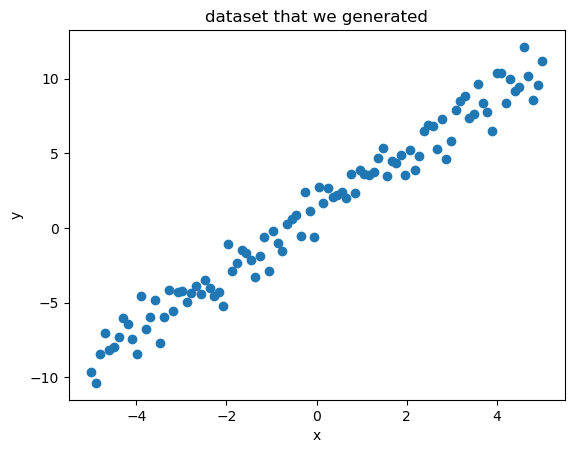

In [5]:
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset that we generated')
plt.show()

In [11]:
y1.shape

(100,)

In [11]:
def gradient_descent(x, y, num_iters,  alpha):
    num_samples = x.shape[0]
    
    w=0 # initialize weights 
    b=0
    
    error_hist= [] # we want to track the error
    for i in range(num_iters):

        y_pred = w*x + b 
        dw = (1/num_samples)*np.dot(np.transpose(x),y_pred - y)
        db = (1/num_samples)*np.sum(y_pred - y)
        
        w = w - alpha*dw
        b = b - alpha*db
        
        # ploting error 
        error_hist.append(cost(y_pred, y))
    fig, axes = plt.subplots(1, 2) 
    y_pred = w*x + b
    axes[0].scatter(x1, y1)
    axes[0].plot(x, y_pred, c='orange',  linewidth=2.0)
    axes[0].set_title('line that fits  data')

    
    axes[1].plot(error_hist)


    return w, b
    


    

        
        
    


    

(2.0151751257825166, 1.007490933009935)

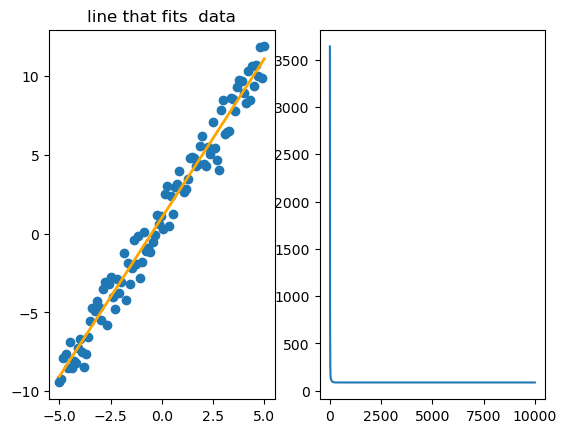

In [12]:

t_2 = gradient_descent(x1, y1, num_iters=10000, alpha=0.01)
t_2